In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   EngineSize   428 non-null    float64
 7   Cylinders    426 non-null    float64
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 46.9+ KB


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   EngineSize   426 non-null    float64
 7   Cylinders    426 non-null    float64
 8   Horsepower   426 non-null    int64  
 9   MPG_City     426 non-null    int64  
 10  MPG_Highway  426 non-null    int64  
 11  Weight       426 non-null    int64  
 12  Wheelbase    426 non-null    int64  
 13  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 49.9+ KB


In [6]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755",3.5,6.0,225,18,24,3880,115,197


## Preprocessing

In [7]:
#df['MSRP'] = df['MSRP'].apply(lambda x: x[1:3] + x[4:])
df['Price'] = df['MSRP'].replace({'\$': '', ',': ''}, regex=True).astype(int)
df = df.drop('MSRP', axis=1)
df

,Make,Model,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Price
0,Acura,MDX,SUV,Asia,All,3.5,6.0,265,17,23,4451,106,189,36945
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,2.0,4.0,200,24,31,2778,101,172,23820
2,Acura,TSX 4dr,Sedan,Asia,Front,2.4,4.0,200,22,29,3230,105,183,26990
3,Acura,TL 4dr,Sedan,Asia,Front,3.2,6.0,270,20,28,3575,108,186,33195
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,3.5,6.0,225,18,24,3880,115,197,43755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,2.4,5.0,197,21,28,3450,105,186,40565
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,2.3,5.0,242,20,26,3450,105,186,42565
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,2.9,6.0,268,19,26,3653,110,190,45210
426,Volvo,V40,Wagon,Europe,Front,1.9,4.0,170,22,29,2822,101,180,26135


array([[<Axes: title={'center': 'EngineSize'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Horsepower'}>],
       [<Axes: title={'center': 'MPG_City'}>,
        <Axes: title={'center': 'MPG_Highway'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Wheelbase'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

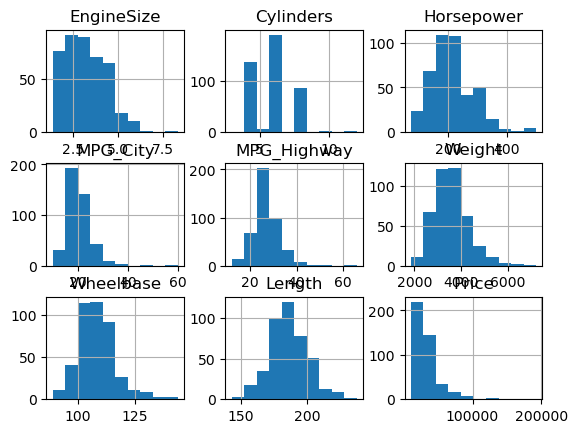

In [8]:
df.hist()

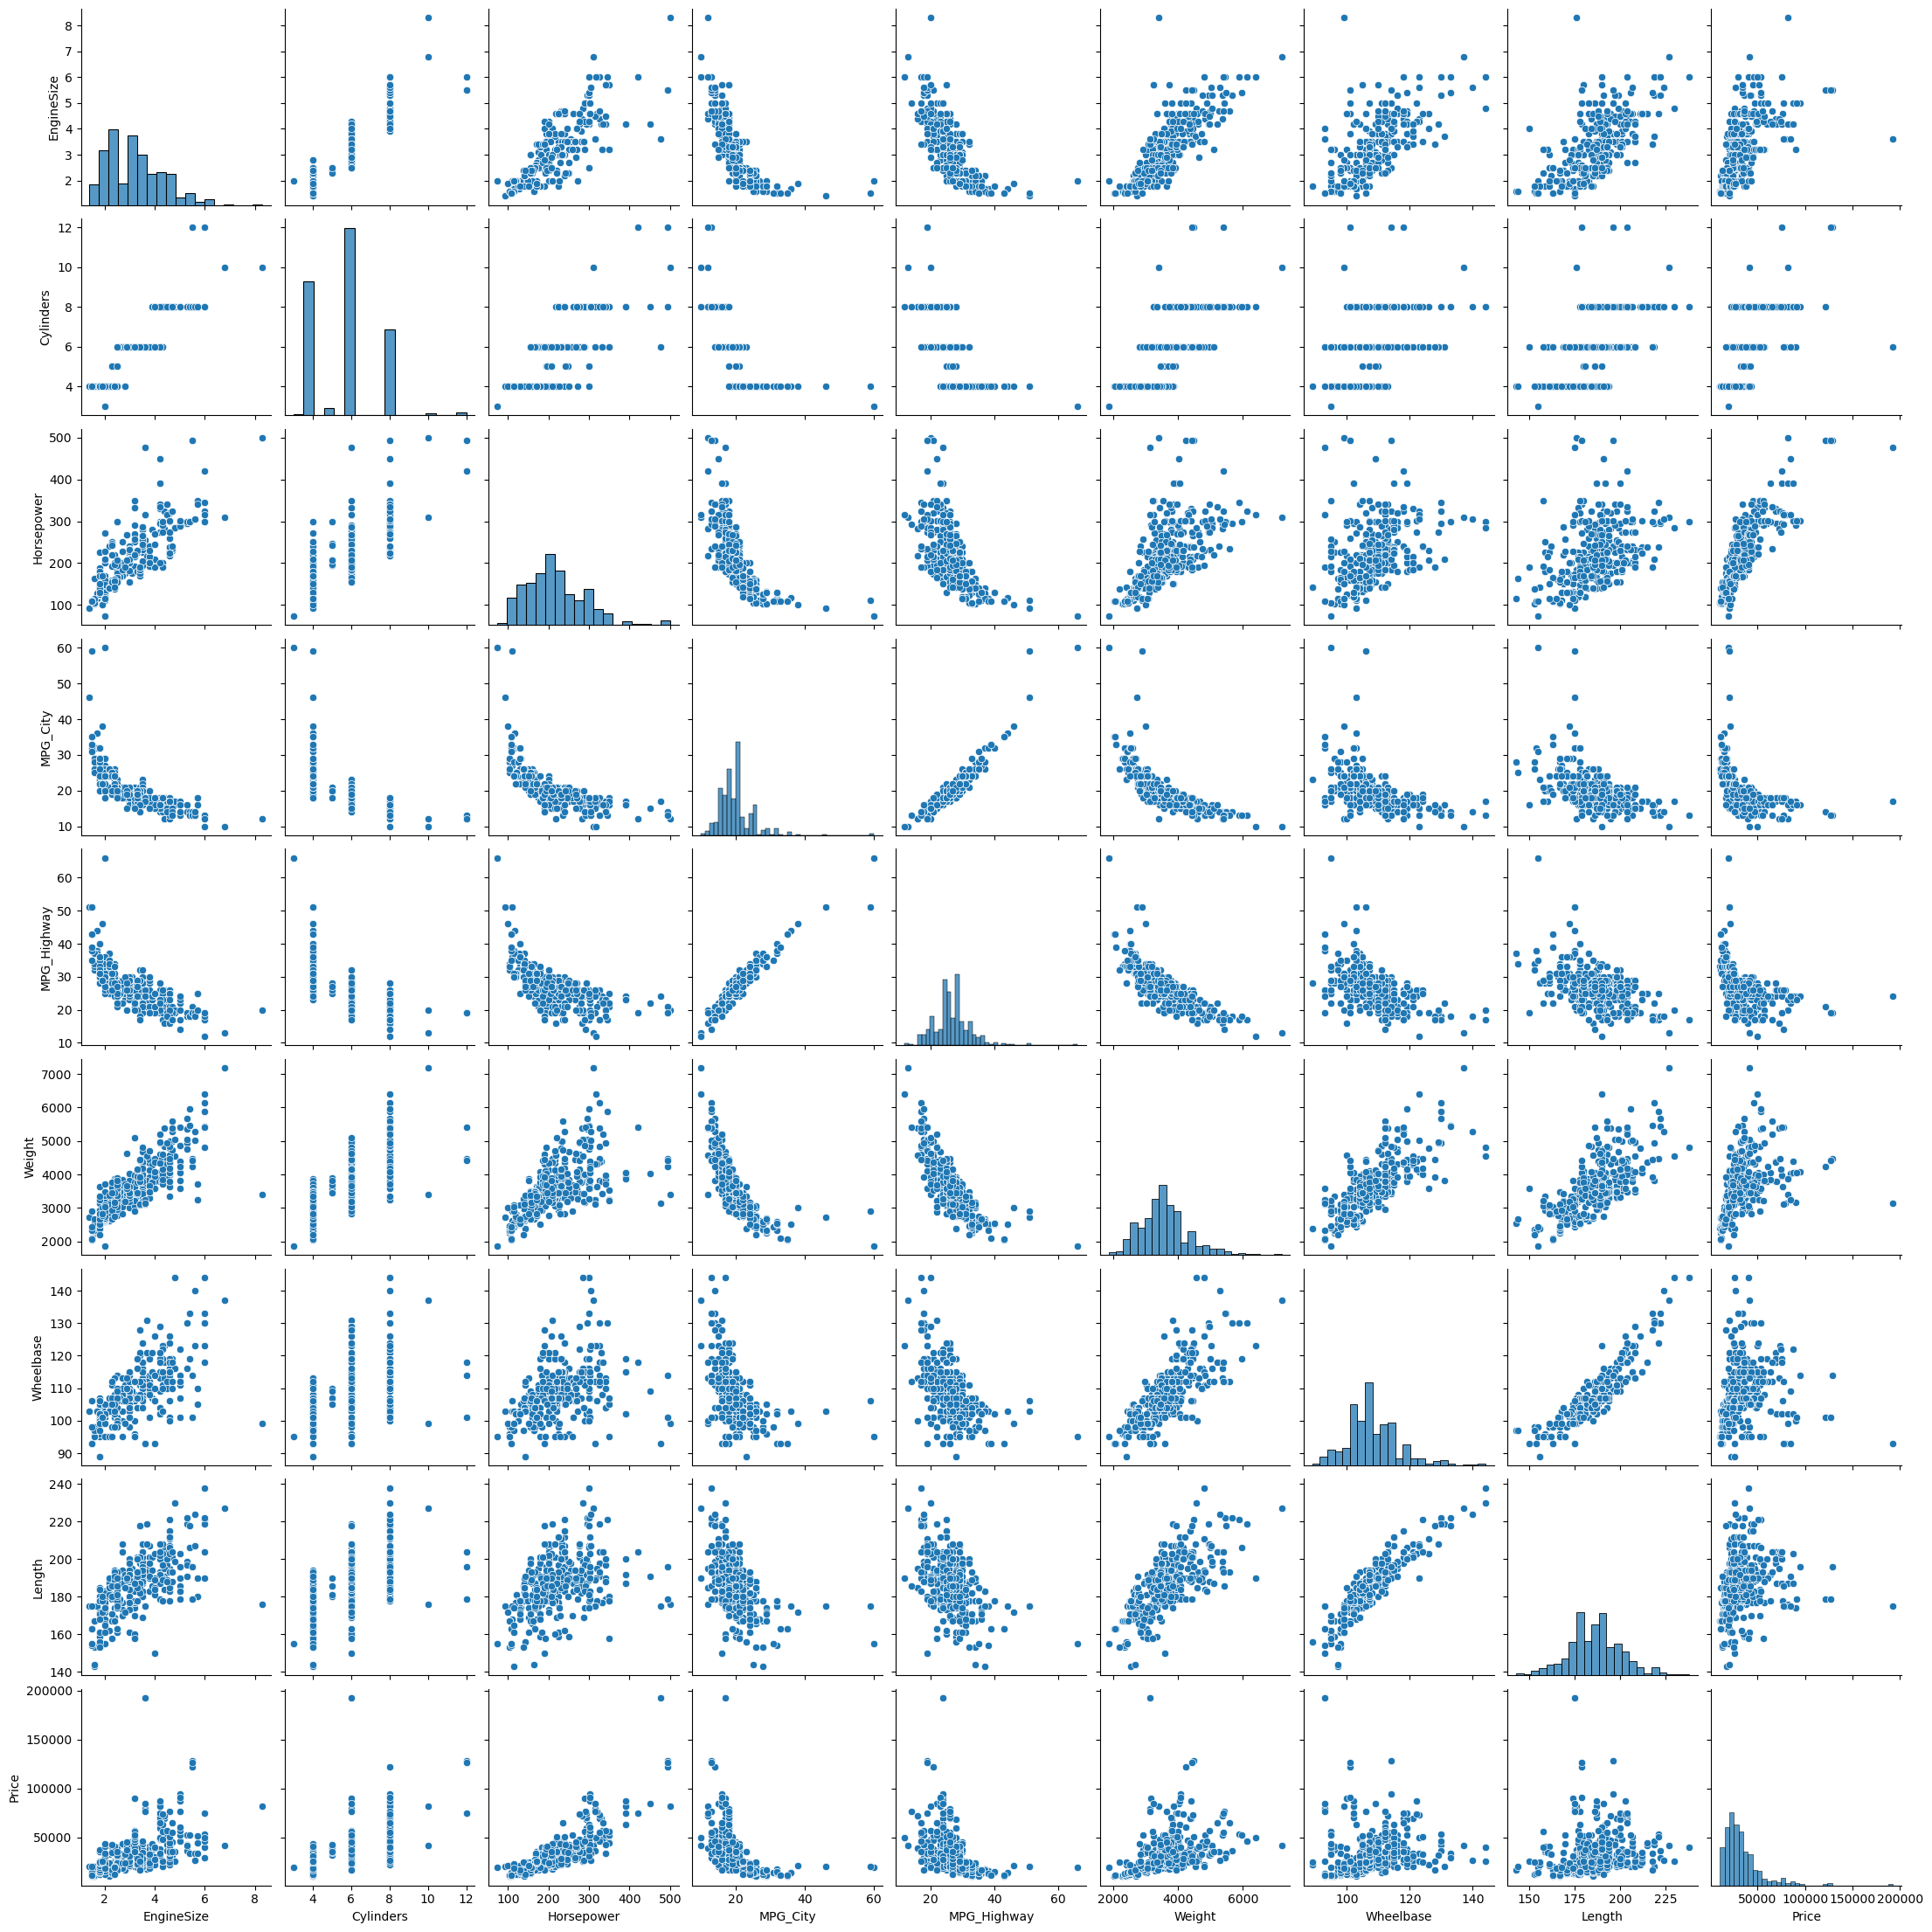

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

<Axes: >

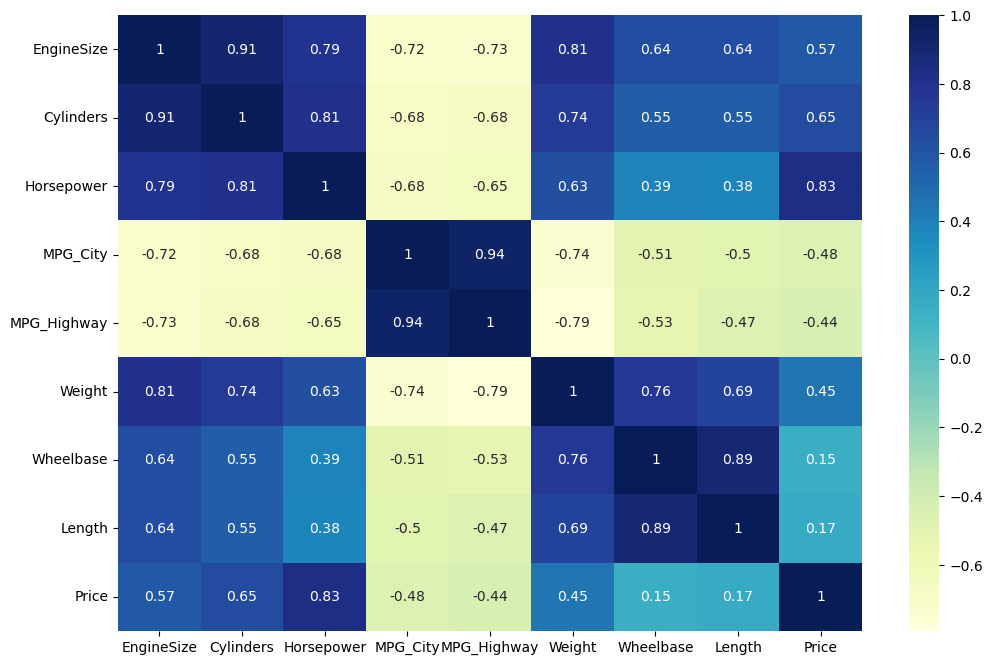

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")

### Manufacturer of the car

In [15]:
import plotly.express as px

fig = px.histogram(df, x="Make", 
                   labels= {"Make": "Manufacturer"},
                   title="Manufacturer of the car",
                   color_discrete_sequence=["green"])

fig.show()


### Origin

In [16]:

fig = px.histogram(df, x="Origin", 
                   title="Origin of the car",
                   color_discrete_sequence=["gray"])

fig.show()

In [30]:
df_new = pd.get_dummies(df, columns=['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])

In [31]:
df_new.head()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Price,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,3.5,6.0,265,17,23,4451,106,189,36945,True,...,False,False,False,False,True,False,False,True,False,False
1,2.0,4.0,200,24,31,2778,101,172,23820,True,...,True,False,False,False,True,False,False,False,True,False
2,2.4,4.0,200,22,29,3230,105,183,26990,True,...,True,False,False,False,True,False,False,False,True,False
3,3.2,6.0,270,20,28,3575,108,186,33195,True,...,True,False,False,False,True,False,False,False,True,False
4,3.5,6.0,225,18,24,3880,115,197,43755,True,...,True,False,False,False,True,False,False,False,True,False


In [32]:
df_new.shape

(426, 482)

## Training model

In [33]:
X = df_new.drop('Price', axis=1)
y = df_new['Price']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.8544163683700465

## Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.6407633095356082

## Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
random_model.score(X_test, y_test)

0.8620134433306075

## XGBoost Regression

In [38]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.8046935796737671

### From the basic data analysis and preprocessing it looks like we can encode Make, Type, Drivetrain, Origin

In [42]:
#df = df.join(pd.get_dummies(df['Make'], dtype=int))
#df = df.drop("Make", axis=1)
#df

,Model,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,...,Pontiac,Porsche,Saab,Saturn,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo
0,MDX,SUV,Asia,All,3.5,6.0,265,17,23,4451,...,0,0,0,0,0,0,0,0,0,0
1,RSX Type S 2dr,Sedan,Asia,Front,2.0,4.0,200,24,31,2778,...,0,0,0,0,0,0,0,0,0,0
2,TSX 4dr,Sedan,Asia,Front,2.4,4.0,200,22,29,3230,...,0,0,0,0,0,0,0,0,0,0
3,TL 4dr,Sedan,Asia,Front,3.2,6.0,270,20,28,3575,...,0,0,0,0,0,0,0,0,0,0
4,3.5 RL 4dr,Sedan,Asia,Front,3.5,6.0,225,18,24,3880,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,C70 LPT convertible 2dr,Sedan,Europe,Front,2.4,5.0,197,21,28,3450,...,0,0,0,0,0,0,0,0,0,1
424,C70 HPT convertible 2dr,Sedan,Europe,Front,2.3,5.0,242,20,26,3450,...,0,0,0,0,0,0,0,0,0,1
425,S80 T6 4dr,Sedan,Europe,Front,2.9,6.0,268,19,26,3653,...,0,0,0,0,0,0,0,0,0,1
426,V40,Wagon,Europe,Front,1.9,4.0,170,22,29,2822,...,0,0,0,0,0,0,0,0,0,1


In [43]:
#df = df.join(pd.get_dummies(df['Type'], dtype=int))
#df = df.drop("Type", axis=1)
#df

,Model,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,...,Suzuki,Toyota,Volkswagen,Volvo,Hybrid,SUV,Sedan,Sports,Truck,Wagon
0,MDX,Asia,All,3.5,6.0,265,17,23,4451,106,...,0,0,0,0,0,1,0,0,0,0
1,RSX Type S 2dr,Asia,Front,2.0,4.0,200,24,31,2778,101,...,0,0,0,0,0,0,1,0,0,0
2,TSX 4dr,Asia,Front,2.4,4.0,200,22,29,3230,105,...,0,0,0,0,0,0,1,0,0,0
3,TL 4dr,Asia,Front,3.2,6.0,270,20,28,3575,108,...,0,0,0,0,0,0,1,0,0,0
4,3.5 RL 4dr,Asia,Front,3.5,6.0,225,18,24,3880,115,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,C70 LPT convertible 2dr,Europe,Front,2.4,5.0,197,21,28,3450,105,...,0,0,0,1,0,0,1,0,0,0
424,C70 HPT convertible 2dr,Europe,Front,2.3,5.0,242,20,26,3450,105,...,0,0,0,1,0,0,1,0,0,0
425,S80 T6 4dr,Europe,Front,2.9,6.0,268,19,26,3653,110,...,0,0,0,1,0,0,1,0,0,0
426,V40,Europe,Front,1.9,4.0,170,22,29,2822,101,...,0,0,0,1,0,0,0,0,0,1


In [44]:
#df = df.join(pd.get_dummies(df['Origin'], dtype=int))
#df = df.drop("Origin", axis=1)
#df

,Model,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Volvo,Hybrid,SUV,Sedan,Sports,Truck,Wagon,Asia,Europe,USA
0,MDX,All,3.5,6.0,265,17,23,4451,106,189,...,0,0,1,0,0,0,0,1,0,0
1,RSX Type S 2dr,Front,2.0,4.0,200,24,31,2778,101,172,...,0,0,0,1,0,0,0,1,0,0
2,TSX 4dr,Front,2.4,4.0,200,22,29,3230,105,183,...,0,0,0,1,0,0,0,1,0,0
3,TL 4dr,Front,3.2,6.0,270,20,28,3575,108,186,...,0,0,0,1,0,0,0,1,0,0
4,3.5 RL 4dr,Front,3.5,6.0,225,18,24,3880,115,197,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,C70 LPT convertible 2dr,Front,2.4,5.0,197,21,28,3450,105,186,...,1,0,0,1,0,0,0,0,1,0
424,C70 HPT convertible 2dr,Front,2.3,5.0,242,20,26,3450,105,186,...,1,0,0,1,0,0,0,0,1,0
425,S80 T6 4dr,Front,2.9,6.0,268,19,26,3653,110,190,...,1,0,0,1,0,0,0,0,1,0
426,V40,Front,1.9,4.0,170,22,29,2822,101,180,...,1,0,0,0,0,0,1,0,1,0


In [45]:
#df = df.join(pd.get_dummies(df['DriveTrain'], dtype=int))
#df = df.drop("DriveTrain", axis=1)
#df

,Model,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Price,...,Sedan,Sports,Truck,Wagon,Asia,Europe,USA,All,Front,Rear
0,MDX,3.5,6.0,265,17,23,4451,106,189,36945,...,0,0,0,0,1,0,0,1,0,0
1,RSX Type S 2dr,2.0,4.0,200,24,31,2778,101,172,23820,...,1,0,0,0,1,0,0,0,1,0
2,TSX 4dr,2.4,4.0,200,22,29,3230,105,183,26990,...,1,0,0,0,1,0,0,0,1,0
3,TL 4dr,3.2,6.0,270,20,28,3575,108,186,33195,...,1,0,0,0,1,0,0,0,1,0
4,3.5 RL 4dr,3.5,6.0,225,18,24,3880,115,197,43755,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,C70 LPT convertible 2dr,2.4,5.0,197,21,28,3450,105,186,40565,...,1,0,0,0,0,1,0,0,1,0
424,C70 HPT convertible 2dr,2.3,5.0,242,20,26,3450,105,186,42565,...,1,0,0,0,0,1,0,0,1,0
425,S80 T6 4dr,2.9,6.0,268,19,26,3653,110,190,45210,...,1,0,0,0,0,1,0,0,1,0
426,V40,1.9,4.0,170,22,29,2822,101,180,26135,...,0,0,0,1,0,1,0,0,1,0


### Basic model training

In [46]:
df.columns

Index(['Model', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City',
       'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'Price', 'Acura',
       'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'MINI',
       'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan',
       'Oldsmobile', 'Pontiac', 'Porsche', 'Saab', 'Saturn', 'Scion', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'Hybrid', 'SUV', 'Sedan',
       'Sports', 'Truck', 'Wagon', 'Asia', 'Europe', 'USA', 'All', 'Front',
       'Rear'],
      dtype='object')